[-5.93357146e+01  6.05248633e+02 -2.66396422e+03  6.59485913e+03
 -1.00078430e+04  9.49586908e+03 -5.50902818e+03  1.83770524e+03
 -3.15480125e+02  2.15307159e+01  3.97310960e-01]


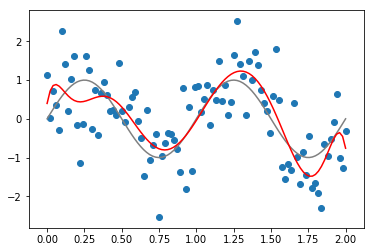

In [66]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
from scipy.integrate import fixed_quad

b = 2               # 周期的个数
m = 100             # training set 中元素的个数
l = 100
x0 = np.linspace(0, b, l)
y0 = np.sin(2 * np.pi * x0)
x = np.linspace(0, b, m)

y = np.zeros(m)
for i in range(m):
    y[i] = np.sin(2 * np.pi * x[i])
    y[i] =  y[i] + np.random.normal(0, .8)  # 加入 Gauss 分布的噪声
plt.plot(x0, y0, 'gray')
plt.scatter(x, y)

yf = np.zeros(l)
n = 10              # 多项式拟合的最高阶
a = np.polyfit(x, y, n)
for i in range(l):
    for j in range(n+1):
        yf[i] = yf[i] + a[n-j]*x0[i]**j
plt.plot(x0, yf, 'r')


print(a)

In [70]:
help(np.polyfit)

Help on function polyfit in module numpy:

polyfit(x, y, deg, rcond=None, full=False, w=None, cov=False)
    Least squares polynomial fit.
    
    Fit a polynomial ``p(x) = p[0] * x**deg + ... + p[deg]`` of degree `deg`
    to points `(x, y)`. Returns a vector of coefficients `p` that minimises
    the squared error in the order `deg`, `deg-1`, ... `0`.
    
    The `Polynomial.fit <numpy.polynomial.polynomial.Polynomial.fit>` class
    method is recommended for new code as it is more stable numerically. See
    the documentation of the method for more information.
    
    Parameters
    ----------
    x : array_like, shape (M,)
        x-coordinates of the M sample points ``(x[i], y[i])``.
    y : array_like, shape (M,) or (M, K)
        y-coordinates of the sample points. Several data sets of sample
        points sharing the same x-coordinates can be fitted at once by
        passing in a 2D-array that contains one dataset per column.
    deg : int
        Degree of the fitting po

In [76]:
for i in range(10):
    print(np.random.normal(0, 1))

0.7417803655533023
1.450534096436211
-0.5799811765910895
-0.40830140770749634
1.611093665286363
1.472429080466634
1.6330626033461313
1.0371406281837476
-1.2275874673759595
-0.22002790877927986


In [10]:
import numpy as np
np.polynomial.chebyshev.chebgauss(5)

(array([ 9.51056516e-01,  5.87785252e-01,  6.12323400e-17, -5.87785252e-01,
        -9.51056516e-01]),
 array([0.62831853, 0.62831853, 0.62831853, 0.62831853, 0.62831853]))

In [65]:
import numpy as np
from matplotlib import pyplot as plt
from scipy import integrate
from scipy.integrate import fixed_quad

def ts(f, a, b, n=51):
    up = 4
    h = 2*up / (n-1)
    t = np.linspace(-up, up, n, endpoint=True)
    x = np.tanh(1/2*np.pi*np.sinh(t))
    w = 1/2*h*np.pi*np.cosh(t)
    w = w/(np.cosh(1/2*np.pi*np.sinh(t))**2)
    gc = 0
    for i in range(n):
        p = (x[i]*(b-a) + a + b)/2
        gc = gc + f(p)*w[i]
    err = 0
    gc = gc * (b-a)/2
#    print(p, w)
    return gc, err

def f(x):
    f = 1 / (np.exp(x) - 1)
    return f
a = 0.0001
b = 20
print(fixed_quad(f, a, b))
print(integrate.quad(f, a, b))
print(ts(f, a, b))

(1.571134885081742, None)
(9.210390369498432, 7.542452016230608e-11)
(9.210881381280693, 0)


In [48]:
np.linspace(-2, 2, 3, endpoint=True)

array([-2.,  0.,  2.])

In [47]:
for i in range(2):
    print(i)

0
1
